In [2]:
%load_ext autoreload
%autoreload 2
from wd_setup import WhiteDwarf
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

<Axes: title={'center': 'Total Mass: 0.200$M_{\\odot}$'}, xlabel='Radius (km)', ylabel='Mass ($M_\\odot$)'>

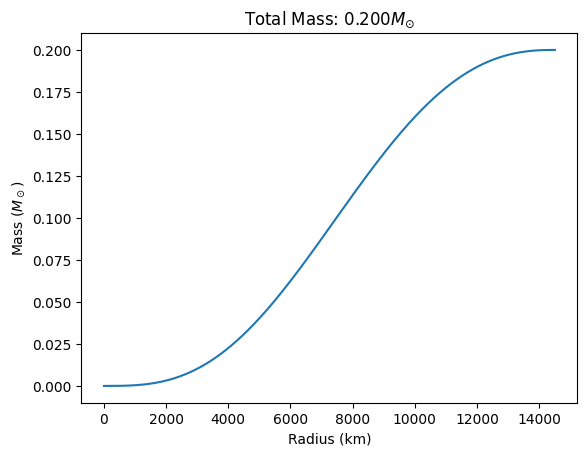

In [23]:
wd_k0 = WhiteDwarf(Ye=0.5, rhoc_scaled=1e-1, Z=6, k=0)
wd_k0.integrate()
wd_k0.plot_profile("M")

<Axes: title={'center': 'Total Mass: 0.584$M_{\\odot}$'}, xlabel='Radius (km)', ylabel='Mass ($M_\\odot$)'>

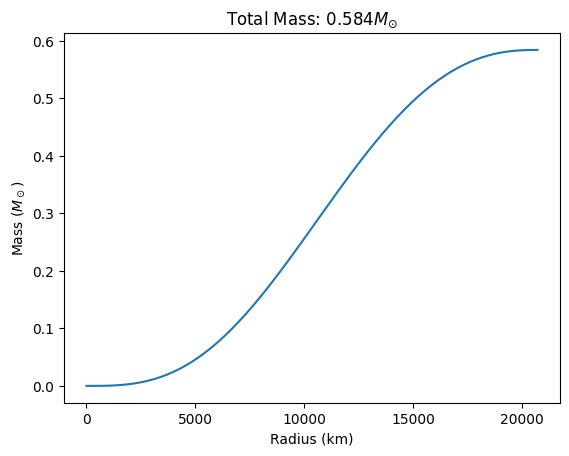

In [45]:
wd = WhiteDwarf(Ye=0.5, rhoc_scaled=1e-1, Z=6, k=2e-34)
wd.integrate()
wd.plot_profile('M')

In [48]:
from constants import proton_energy
wd.p_decay.luminosity(E_gamma=proton_energy, m=wd.mass*wd.M0)

1.0387266534430944e+20

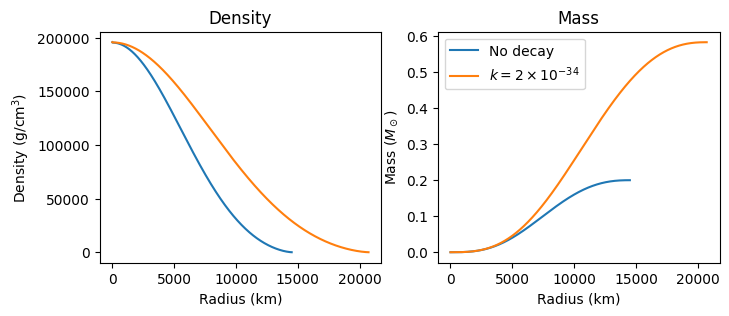

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
wd_k0.plot_profile('rho', ax=ax[0], label='No decay')
wd.plot_profile('rho', ax=ax[0], label=r'$k=2\times10^{-34}$', title='Density')
wd_k0.plot_profile('M', ax=ax[1], label='No decay')
wd.plot_profile('M', ax=ax[1], label=r'$k=2\times10^{-34}$', title='Mass')
plt.legend()

In [51]:
def get_MR(k):
    R = []
    M = []
    L = []
    rho_range = np.logspace(-1, 0, 5)
    for rho in tqdm(rho_range):
        wd = WhiteDwarf(Ye=0.5, rhoc_scaled=rho, Z=6, k=k)
        wd.integrate()
        R.append(wd.rbar2r(wd.radius))
        M.append(wd.mbar2m(wd.mass))
        L.append(wd.p_decay.luminosity(E_gamma=proton_energy, m=wd.mass*wd.M0))

    return np.array(R), np.array(M), np.array(L)

In [52]:
r0, m0, L0 = get_MR(0)
r1, m1, L1= get_MR(2.5e-34)
r2, m2, L2 = get_MR(2e-34)
r3, m3, L3 = get_MR(2.7e-34)

100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


In [29]:
df = pd.read_csv("/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/data/MWDD-export.csv")
df = df.dropna(subset=df.columns)
df.head
M_SOLAR = 1.989e+30
G = 6.674e-11

def g2r(surface_g, mass):
    g = 10 ** surface_g / 100
    mass_kg = mass * M_SOLAR

    radius = np.sqrt(G * mass_kg / g)

    return radius / 1000 # m to km
radius = g2r(df['logg'], df['mass'])
df['radius'] = radius

/Users/caritsang/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
df.head

<bound method NDFrame.head of                          wdid       icrsra       icrsdec     teff   logg  \
0                 * alf CMa B  06 45 08.79  -16 43 15.36  26083.0  8.610   
1                 * alf CMi B  07 39 17.88   05 13 26.76   7585.0  7.964   
2               * omi02 Eri B  04 15 19.39  -07 40 22.63  16265.0  7.916   
6       1RXS J000359.1+433600  00 03 58.84   43 36 01.64  46850.0  9.050   
7       1RXS J023947.9+500349  02 39 48.39   50 03 48.27  34150.0  8.670   
...                       ...          ...           ...      ...    ...   
144843           [ZHV2014] 64  10 23 08.52   00 23 30.22   7455.0  5.547   
144844          [ZHV2014] 646  12 38 18.71   09 04 39.84   7264.0  5.506   
144845          [ZHV2014] 647  12 38 19.04   09 08 13.67   9514.0  6.000   
144846          [ZHV2014] 648  12 38 20.73  -02 50 44.68   7781.0  5.803   
144847          [ZHV2014] 901  13 10 34.19   00 42 05.64   7540.0  5.960   

           mass        radius  
0       0.94000   5534.44

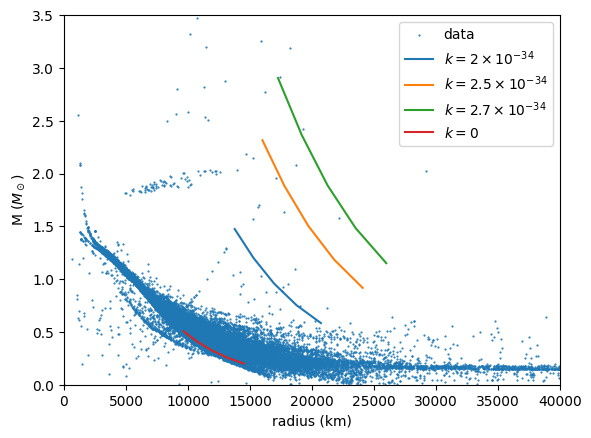

In [65]:
plt.scatter(df['radius'], df['mass'], label='data', s=0.3)
plt.ylim(0, 3.5)
plt.xlim(0, 40000)
plt.xlabel("radius (km)")
plt.ylabel(r"M ($M_\odot$)")
plt.plot(r2, m2, label=r'$k=2\times10^{-34}$')
plt.plot(r1, m1, label=r'$k=2.5\times10^{-34}$')
plt.plot(r3, m3, label=r'$k=2.7\times10^{-34}$')
plt.plot(r0, m0, label=r'$k=0$')
plt.legend()

In [61]:
L1

array([2.04039068e+20, 2.62912944e+20, 3.34518278e+20, 4.18964703e+20,
       5.14965810e+20])

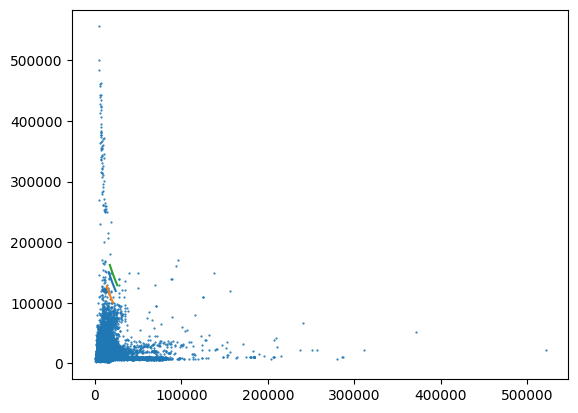

In [ ]:
from constants import L_SOLAR
def L2mag(L):
    L_ratio = L/L_SOLAR
    mag_bol = -2.5 * np.log10(L_ratio) + 4.74
    return mag_bol

plt.plot(r1, (L1 / (4 * np.pi * r1 ** 2)) ** 0.25, label=r'$2.5\times10^{-34$')
plt.plot(r2, (L2) ** 0.25, label=r'$2\times10^{-34$')
plt.plot(r3, (L3) ** 0.25, label=r'$2.7\times10^{-34$')
plt.scatter(df['radius'], df['teff'], label='data', s=0.3)